# Classification with KNN: The telecommunication customer churn data

In [1]:
#to avoid warning messages
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

## I. Data preprocessing
  ### 1.  Data exploring

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
# path = 'C:/Users/Lenovo/Desktop/data analysis tutorial/data mining/python/KNN/churn homework'
# filename = 'telco.csv'
# fullpath = path+'/'+filename
data = pd.read_csv('C:/Users/Lenovo/Desktop/data analysis tutorial/data mining/python/KNN/churn homework/telco.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

**customerID**: Customer ID  
**gender**: Whether the customer is a male or a female    
**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)  
**Partner**: Whether the customer has a partner or not (Yes, No)  
**Dependents**: Whether the customer has dependents or not (Yes, No)  
**tenure**: Number of months the customer has stayed with the company  
**PhoneService**: Whether the customer has a phone service or not (Yes, No)  
**MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)  
**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)  
**OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)  
**OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)  
**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)  
**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)  
**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)  
**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)  
**Contract**: The contract term of the customer (Month-to-month, One year, Two year)  
**PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)  
**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
**MonthlyCharges**: The amount charged to the customer monthly  
**TotalCharges**: The total amount charged to the customer  
**Churn**: Whether the customer churned or not (Yes or No)  

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2.  Data cleaning  
#### a)  Missing values

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## II.  Data engineering

In [10]:
# Droppinig customerID
data.drop('customerID', axis=1, inplace=True)

# The "SeniorCitizen" is a categorical variable however it appears as a numerical one so we will Replacing 1/0 with Yes/No
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No', 1:'Yes'})

# Replacing Yes/No in the target variable (Churn) with 1/0

data['Churn'] = data['Churn'].map({'No':0, 'Yes':1})

In [11]:
# TotalCharges type is object however it is supposed to be  numerical
# We will convert it into numerical data type

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Checking its datatype
data['TotalCharges'].dtypes

dtype('float64')

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

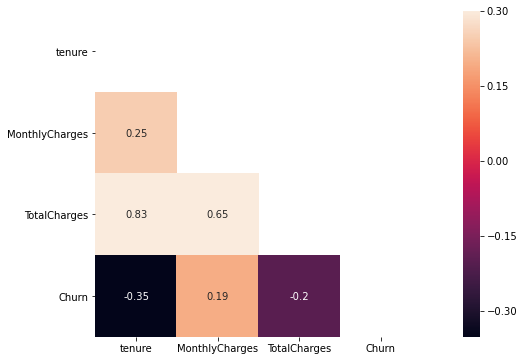

In [12]:
import seaborn as sns

data_corr = data.corr()

mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(data_corr, mask=mask, vmax=.3, square=True, annot=True)
plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=3600, ha="center")

In [13]:
#The "TotalCharge" is removed to avoid multicollinearity while training the classifier algorithms

data.drop('TotalCharges', axis=1, inplace=True)


### Some data visualization
  1. Q1: How churners behavior evolve over time?
  2. Q2: Do monthly charges impact the behavior of churners? 
  3. Q3: Are senior citizens more like to churn?
  4. Q3: Do individuals with a partner churn more than those without a partner?

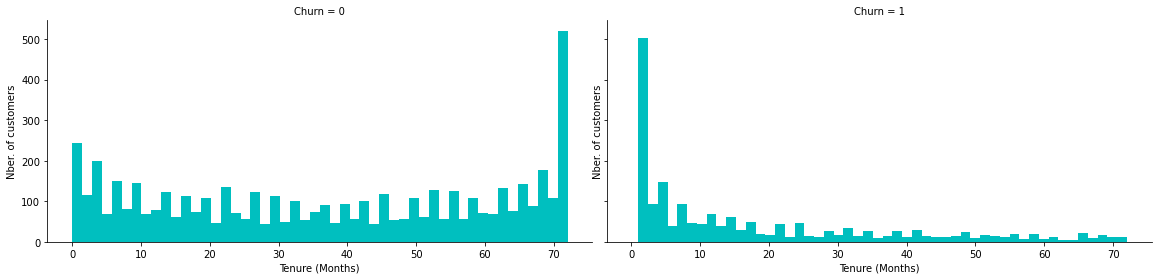

In [14]:
#Q1
# Distribution of Tenure
d = {'color': "cyan"} #if you want to set the graph color to a non-defautl color (blue)
g = sns.FacetGrid(data=data, col='Churn', hue_kws=d, height=4, aspect=2) #The height and aspect allow to enlarge the graph, 
#when aspect is fixed to a num a circle will be stretched such that the height is num times the width.
g.map(plt.hist, 'tenure', bins=50)

g.set(xlabel='Tenure (Months)', ylabel='Nber. of customers') #to get the labels of the x and y axis on each graph

plt.show()

In [15]:
#To determie the number of customer churn given a particular tenure:
# dt=data[(data["Churn"]==1)][data["tenure"]<=2]
# dt["tenure"].value_counts
dt=data[(data["tenure"]<=2)][data["Churn"]==1]
dt["Churn"].value_counts

<bound method IndexOpsMixin.value_counts of 2       1
4       1
20      1
22      1
27      1
       ..
6943    1
6969    1
7010    1
7018    1
7032    1
Name: Churn, Length: 503, dtype: int64>

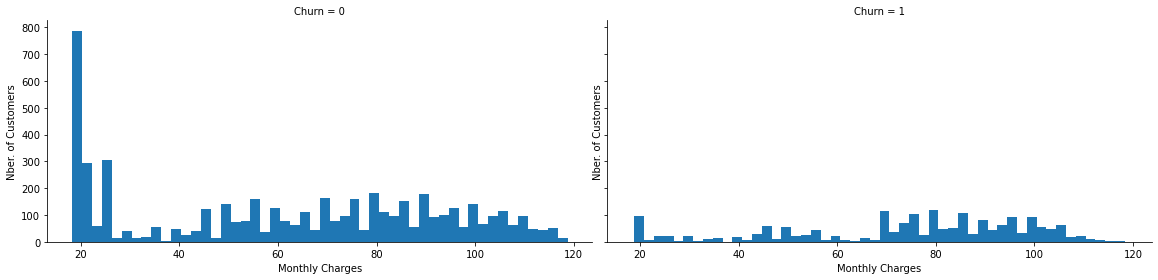

In [16]:
#Q2
# The service charges: 'MonthlyCharges'
#Graph 1: histogram and FacetGrid()

g = sns.FacetGrid(data=data, col='Churn', height=4, aspect=2)
g.map(plt.hist, 'MonthlyCharges', bins=50)
g.set(xlabel='Monthly Charges', ylabel='Nber. of Customers')
plt.show()


Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

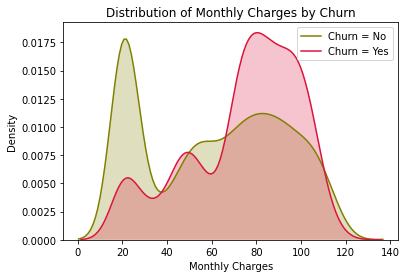

In [17]:
#Graph 2: the Kernel density distribution
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 0) ],color="olive", shade = True) #turn shade to true
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 1) ],ax =ax, color="crimson", shade= True)
  
ax.legend(["Churn = No","Churn = Yes"], loc='upper right') #loc indicates the location of the legend 
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

The graph indicates that customers churn more when the charges are high.

Text(0, 0.5, 'Monthly Charges ($)')

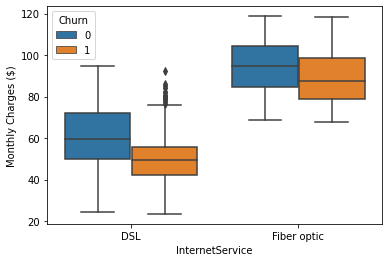

In [18]:
##We can look inside the internet services to determine which one is more expensive for the customer
Dsl_Fiber = data[data['InternetService']!='No'] #we precise that the internet services column has three
#classes: dsl, fiber and No, as we are not interested in the third class, we have to specify that we
#will not take into account this instances to draw our figure, so we choose the values other than "No" 

g = sns.boxplot(x = 'InternetService', y = 'MonthlyCharges',hue="Churn",data=Dsl_Fiber)  
g.set_ylabel('Monthly Charges ($)')


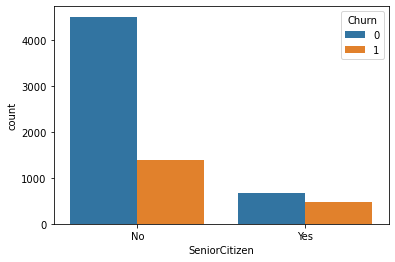

In [19]:
#Q3
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)

In [20]:
#data.SeniorCitizen.value_counts() #gives : No=5901 and Yes=1142
pd.crosstab(data.SeniorCitizen, data.Churn,margins=True,margins_name="Total",normalize='index')

Churn,0,1
SeniorCitizen,,
No,0.763938,0.236062
Yes,0.583187,0.416813
Total,0.734630,0.265370


Our data shows that: 
*  16% (1142/7043) of the customers are senior citizens, and 42% of them churn. 
*  84% (5901/7043) of the customers are not senior citizens, and 24% of them churn

$\Rightarrow$These results show that senior citizens are much more likely to churn

## A. Churn prediction using numerical variables

In [21]:
# Splitting the data into train and test datasets: testing set =30%

y = data['Churn']

X = data[['MonthlyCharges','tenure']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
# K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,70)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)       #Setup a knn classifier with k neighbors
    
    knn.fit(X_train, y_train)                       #Fit the model
    
    train_accuracy[i] = knn.score(X_train, y_train) #Compute accuracy on the training set
    
    test_accuracy[i] = knn.score(X_test, y_test)    #Compute accuracy on the test set

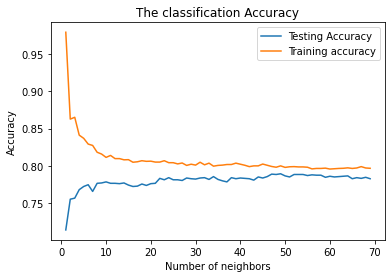

In [23]:
plt.title('The classification Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The figure plots the accuracy of the model when the number of neighbors varies over time.  
*  The testing and training accuracy converge as the number of neighbors increases.

*  The appropriate value of k is about 10.  

In [24]:
knn = KNeighborsClassifier(n_neighbors=10) #We keep 10 for better accuracy rate.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

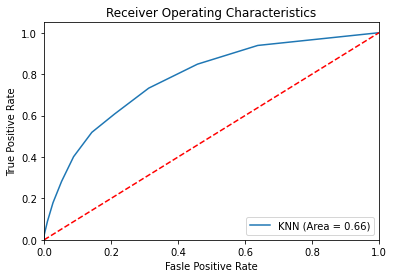

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_knn = knn.predict(X_test)

knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')  #red dashed line
plt.xlim([0.0,1.0])          #To set the x limits of the current axes
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
#plt.savefig('KNN_ROC') #to save the image 
plt.show()

**Definition**: **ROC curve** is a tool which is used to access the performance of a classifier model
at all possible cut-off values. In this curve, the true positive rate (TPR) is plotted against the false positive rate (FPR) for various cut-off values. 
* The diagonal of a ROC graph can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing. A perfect classifier would fall into the top-left corner of the graph with a TPR of 1 and an FPR of 0. 
* Based on the ROC curve, we can then compute the so-called ROC area under the curve (ROC AUC) to characterize the performance of a classification model.  
The TPR is the recall also called the Sensitivity $TP/(TP+FN)$  
The FPR is 1-Specificity= $FP/(TN+FP)$  
* Sentivity increases $\Rightarrow$ Specificity decreases so TPR increases the FPR increases also.  
The Accuracy as measured by the area under the ROC curve is ranked as:  
  *  Excellent (A) if it is between .90-1
  *  Good (B) if it is between .80-.90
  *  Fair (C) if it is between .70-.80
  *  Poor (D) if it is between .60-.70
  *  Fail (F) if it is between .50-.60


According to our KNN specification the estimated AUC based on the ROC curve is 0.66. The algorithm is considering as "bad" at seperating the churner from the non-churner customers.

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[1423,  137],
       [ 331,  222]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1560
           1       0.62      0.40      0.49       553

    accuracy                           0.78      2113
   macro avg       0.71      0.66      0.67      2113
weighted avg       0.76      0.78      0.76      2113



![](explanationoutputconfusionmatrix.png)

## B.  Churn prediction using numerical and categorical data

In [28]:
# Converting the categorical variables into dummy variables

data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy.head()

,tenure,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
# Splitting the data into train and test datasets
# Test will 30% of the orginal dataframe

y = data_dummy['Churn']
X = data_dummy.drop('Churn', axis=1, inplace=False)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
# K Nearest Neighbors Classifier
neighbors = np.arange(1,70)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

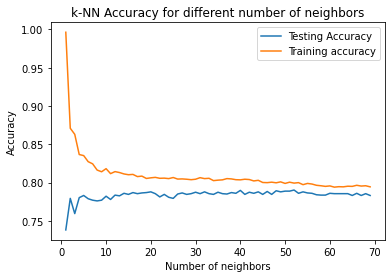

In [31]:
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

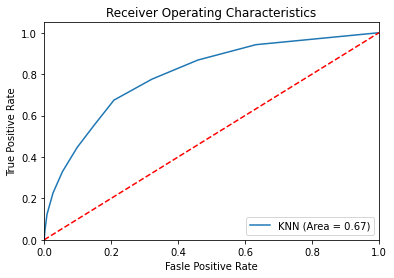

In [33]:
y_pred_knn = knn.predict(X_test)

knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [34]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[1406,  154],
       [ 306,  247]], dtype=int64)

In [35]:
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1560
           1       0.62      0.45      0.52       553

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113

